### Цифрові фільтри

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse, lfilter, welch

plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
plt.rcParams['axes.grid'] = True

Виконання рекурсивного фільтра 2-го порядку

y = lfilter([1], a, x)

a - вектор параметрів фільтра (array_like), a[0] = 1 !!!

x - вхідний сигнал (array_like)

y - сигнал на виході фільтра (array)

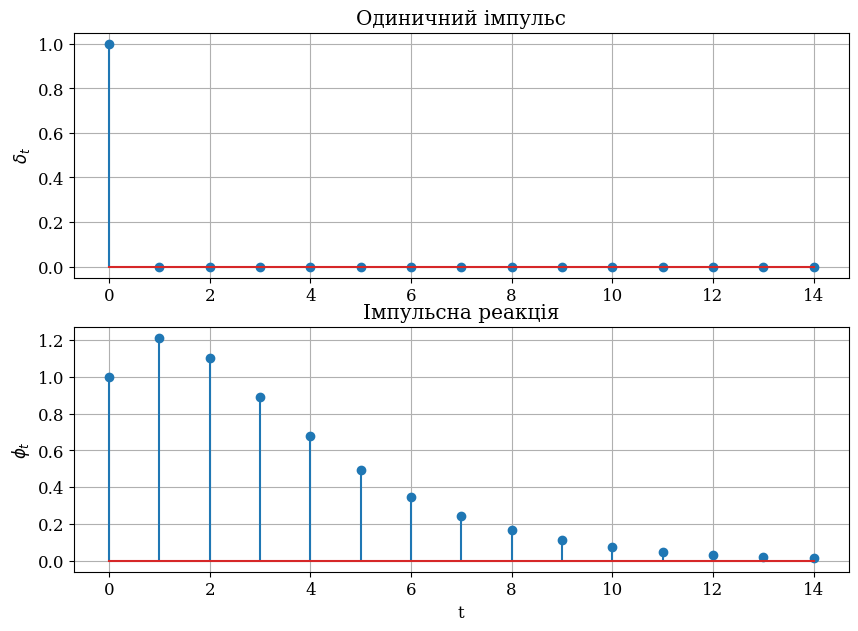

In [19]:
# задаємо параметри фільтра (з таблиці)
a = [1, -1.2131, 0.3679]

x = unit_impulse(15)  
y = lfilter([1], a, x)   

fig, ax = plt.subplots(2, 1, figsize=(10, 7))

ax[0].stem(x)
ax[0].set(ylabel='$ \delta_t$', title='Одиничний імпульс')

ax[1].stem(y)
ax[1].set(xlabel='t', ylabel='$ \phi_t$', title='Імпульсна реакція')

plt.show()

### Сигнал на вході та виході фільтра

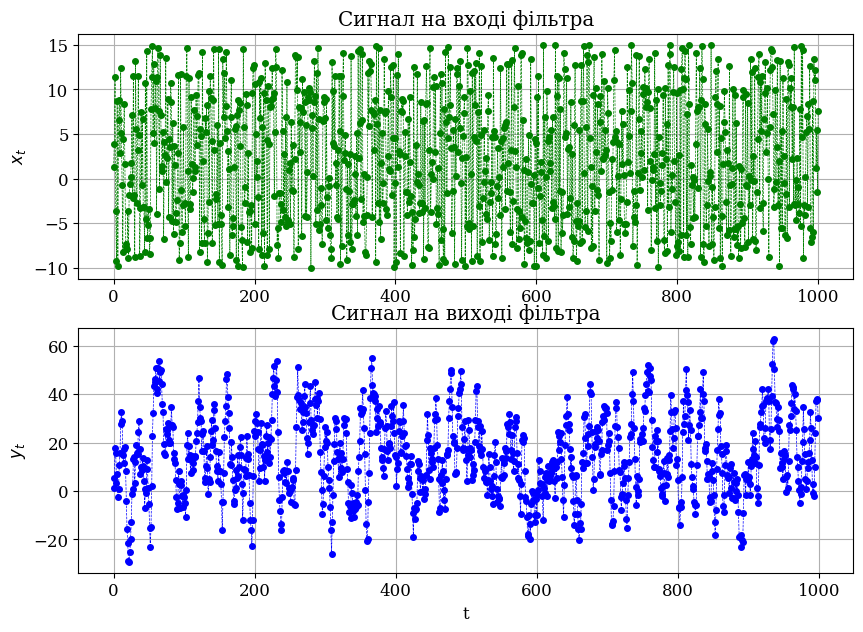

In [15]:
x = np.loadtxt('Lb5_10.prn')

y = lfilter([1], a, x)

fig, ax = plt.subplots(2, 1, figsize=(10, 7))

ax[0].plot(x[0:1000], 'go--', linewidth=0.5, markersize=4)
ax[0].set(ylabel='$x_t$', title='Сигнал на вході фільтра')

ax[1].plot(y[0:1000], 'bo--', linewidth=0.5, markersize=4)
ax[1].set(xlabel='t', ylabel='$y_t$', title='Сигнал на виході фільтра')

plt.show()

### Амплітудно-частотна характеристика рекурсивного фільтра 2-го порядку

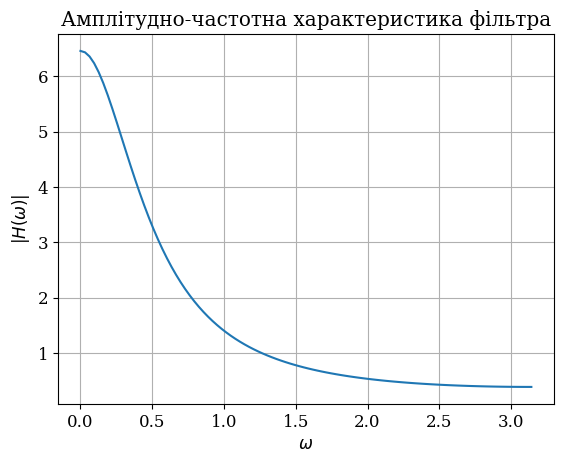

In [16]:
w = np.linspace(0, np.pi, 100)

def H(w):
    return 1 / (1 + a[1]*np.exp(-1j*w)+a[2]*np.exp(-1j*2*w))

plt.plot(w, np.abs(H(w)))
plt.xlabel('$ \omega$')
plt.ylabel('$ |H( \omega )| $')
plt.title('Амплітудно-частотна характеристика фільтра')
plt.show()

### Cпектральна щільність потужності для рекурсивного фільтра

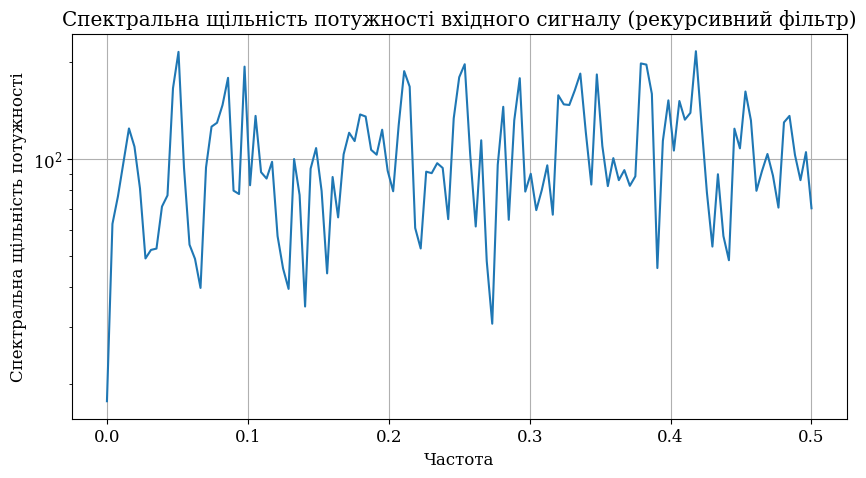

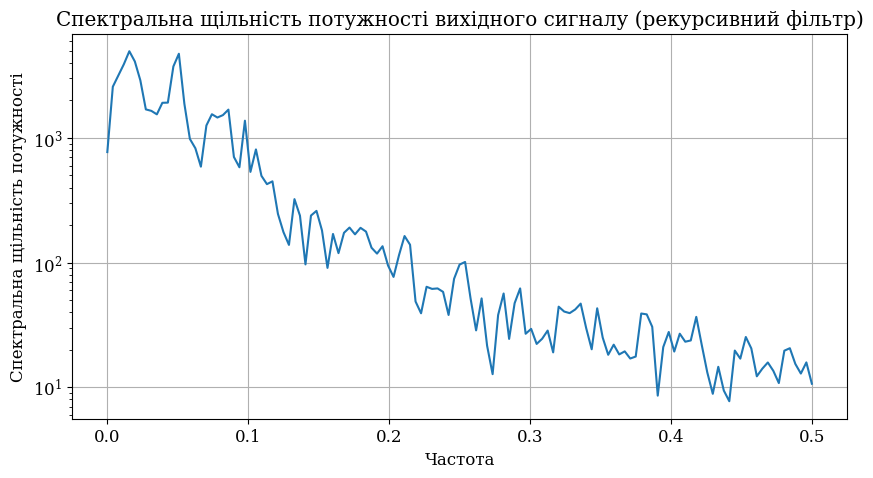

In [17]:
f_x, Pxx = welch(x, nperseg=256)
f_y, Pyy = welch(y, nperseg=256)

plt.figure(figsize=(10, 5))
plt.semilogy(f_x, Pxx)
plt.xlabel('Частота')
plt.ylabel('Спектральна щільність потужності')
plt.title('Спектральна щільність потужності вхідного сигналу (рекурсивний фільтр)')
plt.show()

plt.figure(figsize=(10, 5))
plt.semilogy(f_y, Pyy)
plt.xlabel('Частота')
plt.ylabel('Спектральна щільність потужності')
plt.title('Спектральна щільність потужності вихідного сигналу (рекурсивний фільтр)')
plt.show()

### Висновки, які можна зробити зі спектральних щільностей потужності:

### Вхідний сигнал (перший графік):

Спектральна щільність потужності розподілена доволі рівномірно у всьому частотному діапазоні.

Це свідчить про те, що вхідний сигнал містить широкий спектр частотних компонентів.

### Вихідний сигнал (другий графік):

Спостерігається значне зменшення потужності на високих частотах.

Це свідчить про те, що фільтр виконує функцію низькочастотного фільтра, який пригнічує високочастотні компоненти сигналу.
На нижніх частотах спостерігається висока потужність, що може вказувати на пропускання сигналів у цьому діапазоні.